<a href="https://colab.research.google.com/github/Bhawa1018/EmployeeAttrition/blob/main/mL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Shape: (1470, 35)
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  

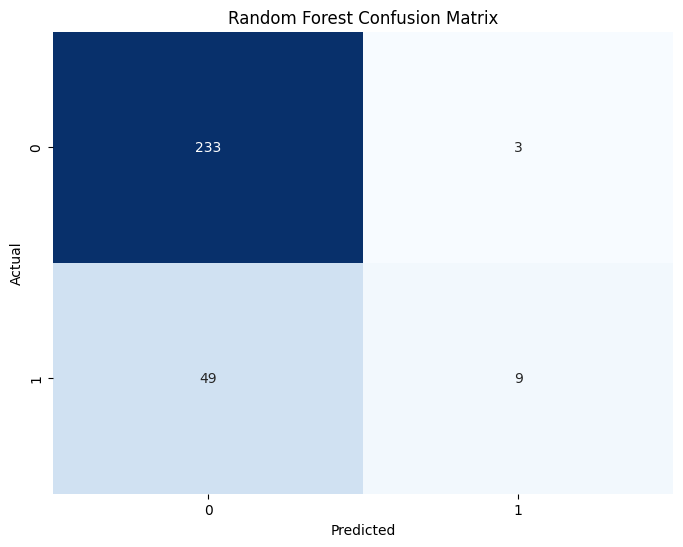

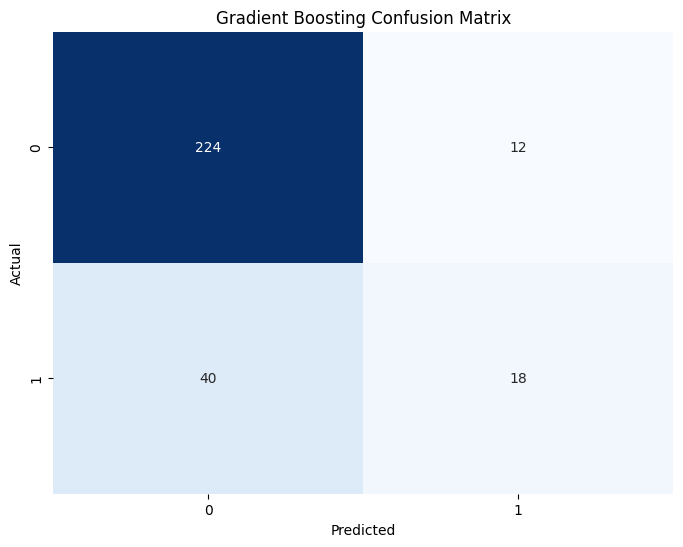

<ipython-input-24-26e7830bcc33>:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette='viridis')


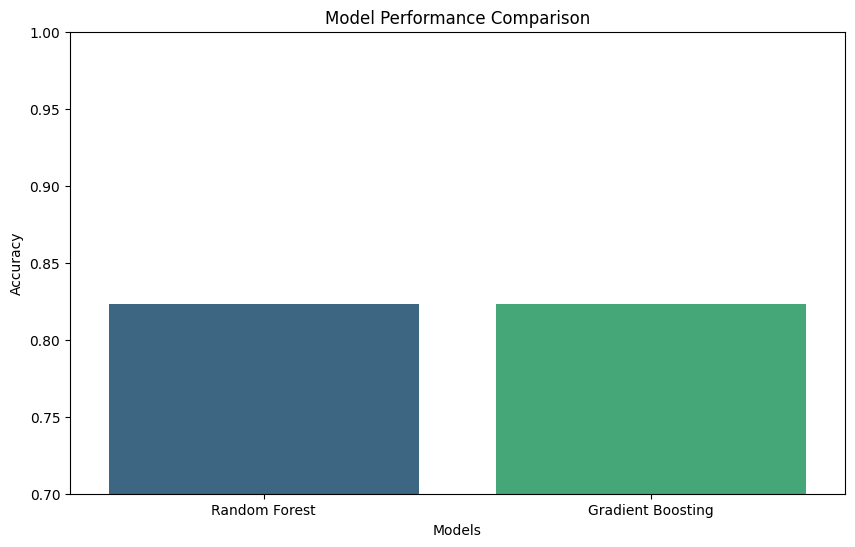

In [ ]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
file_path = '/content/WA_Fn-UseC_-HR-Employee-Attrition.csv'
data = pd.read_csv(file_path)

# Preview the dataset
print("Dataset Shape:", data.shape)
print(data.head())

# Encode categorical variables
encoder = LabelEncoder()
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    data[col] = encoder.fit_transform(data[col])

# Split dataset
X = data.drop(columns='Attrition')  # Features
y = data['Attrition']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train models
rfc = RandomForestClassifier(n_estimators=200, random_state=1)
gbc = GradientBoostingClassifier(n_estimators=200, random_state=1)

rfc.fit(X_train, y_train)
gbc.fit(X_train, y_train)

# Predict using both models
rfc_preds = rfc.predict(X_test)
gbc_preds = gbc.predict(X_test)

# Evaluate models
rfc_accuracy = accuracy_score(y_test, rfc_preds)
gbc_accuracy = accuracy_score(y_test, gbc_preds)

print("Random Forest Accuracy:", rfc_accuracy)
print("Gradient Boosting Accuracy:", gbc_accuracy)

print("\nClassification Report for Gradient Boosting:\n", classification_report(y_test, gbc_preds))

# Confusion Matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, rfc_preds), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Confusion Matrix for Gradient Boosting
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, gbc_preds), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Gradient Boosting Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Barplot of model performance
model_names = ['Random Forest', 'Gradient Boosting']
accuracies = [rfc_accuracy, gbc_accuracy]

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies, palette='viridis')
plt.title('Model Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.7, 1)  # Adjust y-axis range for better clarity
plt.show()


In [ ]:
from sklearn.ensemble import VotingClassifier

# Define base models
model1 = RandomForestClassifier(n_estimators=200, random_state=1)
model2 = GradientBoostingClassifier(n_estimators=200, random_state=1)

# Create a VotingClassifier
voting_clf = VotingClassifier(estimators=[('rf', model1), ('gb', model2)], voting='hard')

# Train the ensemble model
voting_clf.fit(X_train, y_train)

# Evaluate the ensemble model
ensemble_preds = voting_clf.predict(X_test)
print("Voting Classifier Accuracy:", accuracy_score(y_test, ensemble_preds))
print("\nClassification Report for Voting Classifier:\n", classification_report(y_test, ensemble_preds))


Voting Classifier Accuracy: 0.8197278911564626

Classification Report for Voting Classifier:
               precision    recall  f1-score   support

           0       0.82      0.99      0.90       236
           1       0.73      0.14      0.23        58

    accuracy                           0.82       294
   macro avg       0.78      0.56      0.56       294
weighted avg       0.80      0.82      0.77       294



In [ ]:
from sklearn.metrics import roc_auc_score

# Random Forest Evaluation
rfc_accuracy = accuracy_score(y_test, rfc_preds)
rfc_classification_report = classification_report(y_test, rfc_preds)
rfc_roc_auc = roc_auc_score(y_test, rfc.predict_proba(X_test)[:, 1])

print("Random Forest Accuracy:", rfc_accuracy)
print("Classification Report for Random Forest:\n", rfc_classification_report)
print("Random Forest ROC-AUC:", rfc_roc_auc)


Random Forest Accuracy: 0.8231292517006803
Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.83      0.99      0.90       236
           1       0.75      0.16      0.26        58

    accuracy                           0.82       294
   macro avg       0.79      0.57      0.58       294
weighted avg       0.81      0.82      0.77       294

Random Forest ROC-AUC: 0.7909848042080656


In [ ]:
# Gradient Boosting Evaluation
gbc_accuracy = accuracy_score(y_test, gbc_preds)
gbc_classification_report = classification_report(y_test, gbc_preds)
gbc_roc_auc = roc_auc_score(y_test, gbc.predict_proba(X_test)[:, 1])

print("Gradient Boosting Accuracy:", gbc_accuracy)
print("Classification Report for Gradient Boosting:\n", gbc_classification_report)
print("Gradient Boosting ROC-AUC:", gbc_roc_auc)


Gradient Boosting Accuracy: 0.8231292517006803
Classification Report for Gradient Boosting:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90       236
           1       0.60      0.31      0.41        58

    accuracy                           0.82       294
   macro avg       0.72      0.63      0.65       294
weighted avg       0.80      0.82      0.80       294

Gradient Boosting ROC-AUC: 0.7860900058445355


In [ ]:
from sklearn.ensemble import VotingClassifier

# Define Voting Classifier with RFC and GBC
voting_clf = VotingClassifier(estimators=[('rf', rfc), ('gb', gbc)], voting='soft')
voting_clf.fit(X_train, y_train)

# Predictions from Voting Classifier
voting_preds = voting_clf.predict(X_test)

# Voting Classifier Evaluation
voting_accuracy = accuracy_score(y_test, voting_preds)
voting_classification_report = classification_report(y_test, voting_preds)
voting_roc_auc = roc_auc_score(y_test, voting_clf.predict_proba(X_test)[:, 1])

print("Voting Classifier Accuracy:", voting_accuracy)
print("Classification Report for Voting Classifier:\n", voting_classification_report)
print("Voting Classifier ROC-AUC:", voting_roc_auc)


Voting Classifier Accuracy: 0.8197278911564626
Classification Report for Voting Classifier:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90       236
           1       0.62      0.22      0.33        58

    accuracy                           0.82       294
   macro avg       0.73      0.60      0.61       294
weighted avg       0.79      0.82      0.78       294

Voting Classifier ROC-AUC: 0.793322618351841


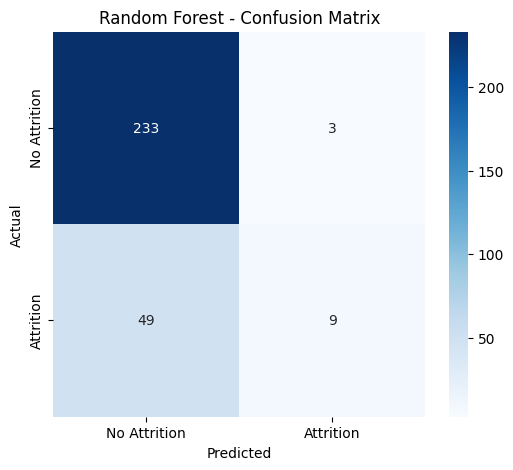

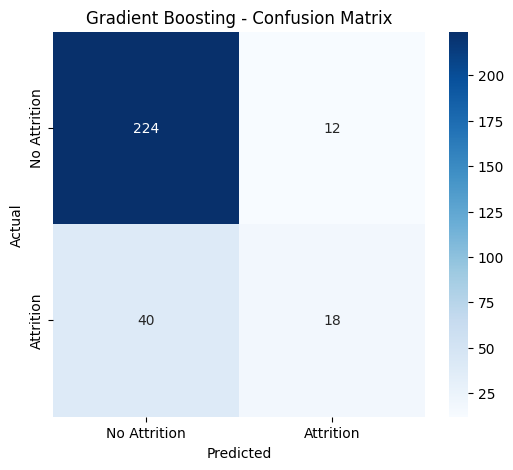

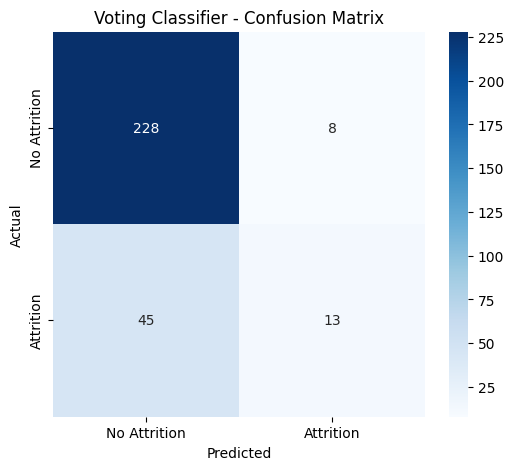

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate Confusion Matrix for Random Forest
rfc_cm = confusion_matrix(y_test, rfc_preds)

# Plot the Confusion Matrix for Random Forest
plt.figure(figsize=(6, 5))
sns.heatmap(rfc_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Random Forest - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Generate Confusion Matrix for Gradient Boosting
gbc_cm = confusion_matrix(y_test, gbc_preds)

# Plot the Confusion Matrix for Gradient Boosting
plt.figure(figsize=(6, 5))
sns.heatmap(gbc_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Gradient Boosting - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Generate Confusion Matrix for Voting Classifier
voting_cm = confusion_matrix(y_test, voting_preds)

# Plot the Confusion Matrix for Voting Classifier
plt.figure(figsize=(6, 5))
sns.heatmap(voting_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Voting Classifier - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


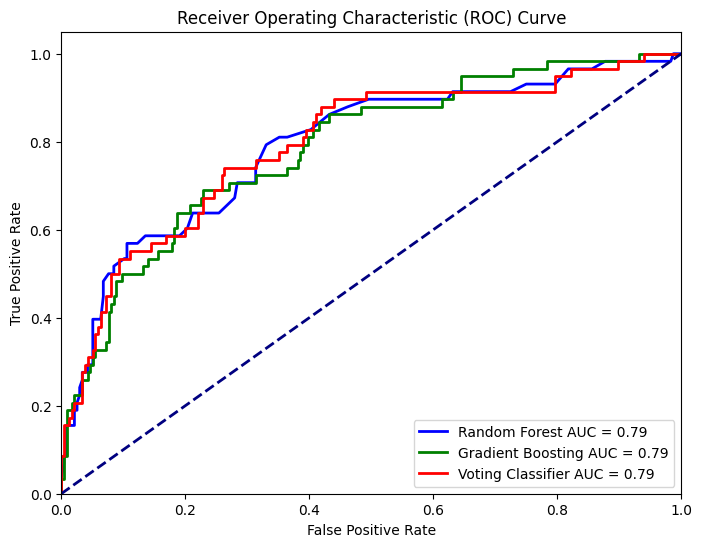

In [ ]:
from sklearn.metrics import roc_curve, auc

# ROC Curve for Random Forest
fpr_rfc, tpr_rfc, _ = roc_curve(y_test, rfc.predict_proba(X_test)[:, 1])
roc_auc_rfc = auc(fpr_rfc, tpr_rfc)

# Plot ROC Curve for Random Forest
plt.figure(figsize=(8, 6))
plt.plot(fpr_rfc, tpr_rfc, color='blue', lw=2, label='Random Forest AUC = %0.2f' % roc_auc_rfc)

# ROC Curve for Gradient Boosting
fpr_gbc, tpr_gbc, _ = roc_curve(y_test, gbc.predict_proba(X_test)[:, 1])
roc_auc_gbc = auc(fpr_gbc, tpr_gbc)

plt.plot(fpr_gbc, tpr_gbc, color='green', lw=2, label='Gradient Boosting AUC = %0.2f' % roc_auc_gbc)

# ROC Curve for Voting Classifier
fpr_voting, tpr_voting, _ = roc_curve(y_test, voting_clf.predict_proba(X_test)[:, 1])
roc_auc_voting = auc(fpr_voting, tpr_voting)

plt.plot(fpr_voting, tpr_voting, color='red', lw=2, label='Voting Classifier AUC = %0.2f' % roc_auc_voting)

# Formatting the plot
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


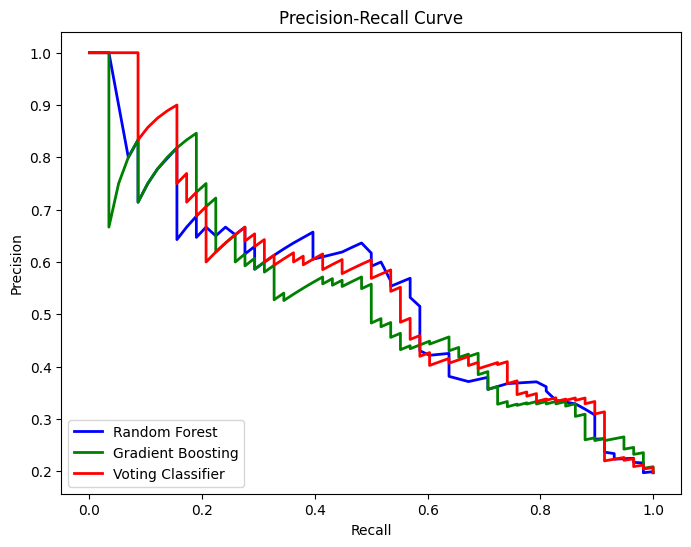

In [ ]:
from sklearn.metrics import precision_recall_curve

# Precision-Recall Curve for Random Forest
precision_rfc, recall_rfc, _ = precision_recall_curve(y_test, rfc.predict_proba(X_test)[:, 1])

# Plot Precision-Recall Curve for Random Forest
plt.figure(figsize=(8, 6))
plt.plot(recall_rfc, precision_rfc, color='blue', lw=2, label='Random Forest')

# Precision-Recall Curve for Gradient Boosting
precision_gbc, recall_gbc, _ = precision_recall_curve(y_test, gbc.predict_proba(X_test)[:, 1])
plt.plot(recall_gbc, precision_gbc, color='green', lw=2, label='Gradient Boosting')

# Precision-Recall Curve for Voting Classifier
precision_voting, recall_voting, _ = precision_recall_curve(y_test, voting_clf.predict_proba(X_test)[:, 1])
plt.plot(recall_voting, precision_voting, color='red', lw=2, label='Voting Classifier')

# Formatting the plot
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


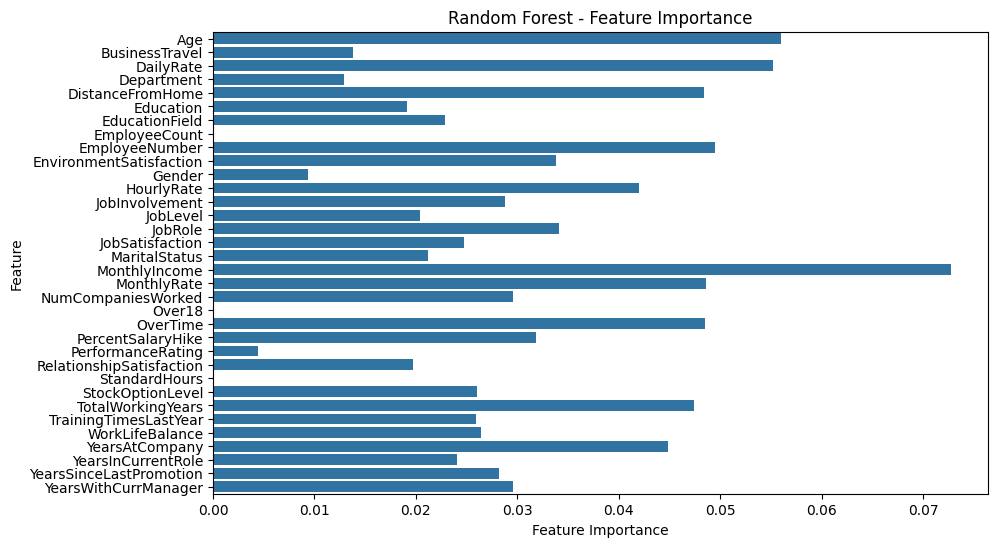

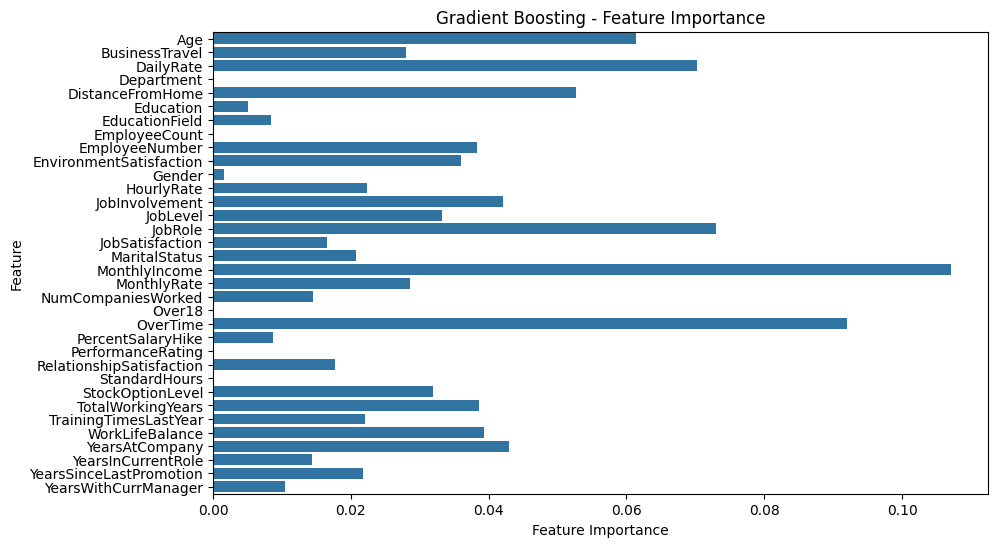

In [ ]:
# Feature Importance for Random Forest
feature_importance_rfc = rfc.feature_importances_
features = X.columns

# Plot Feature Importance for Random Forest
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_rfc, y=features)
plt.title('Random Forest - Feature Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

# Feature Importance for Gradient Boosting
feature_importance_gbc = gbc.feature_importances_

# Plot Feature Importance for Gradient Boosting
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_gbc, y=features)
plt.title('Gradient Boosting - Feature Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()


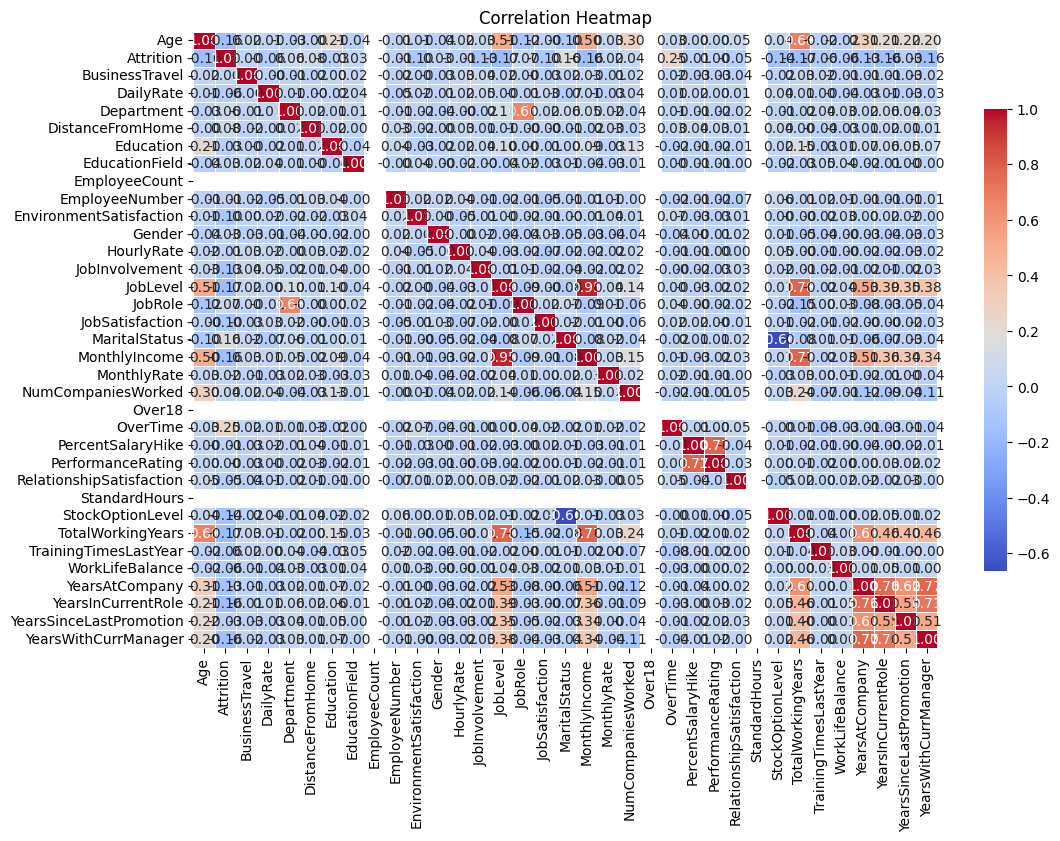

In [ ]:
# Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Set the figure size for the heatmap
plt.figure(figsize=(12, 8))

# Create a heatmap with annotated values
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={'shrink': 0.75})

# Add a title to the heatmap
plt.title("Correlation Heatmap")

# Display the plot
plt.show()


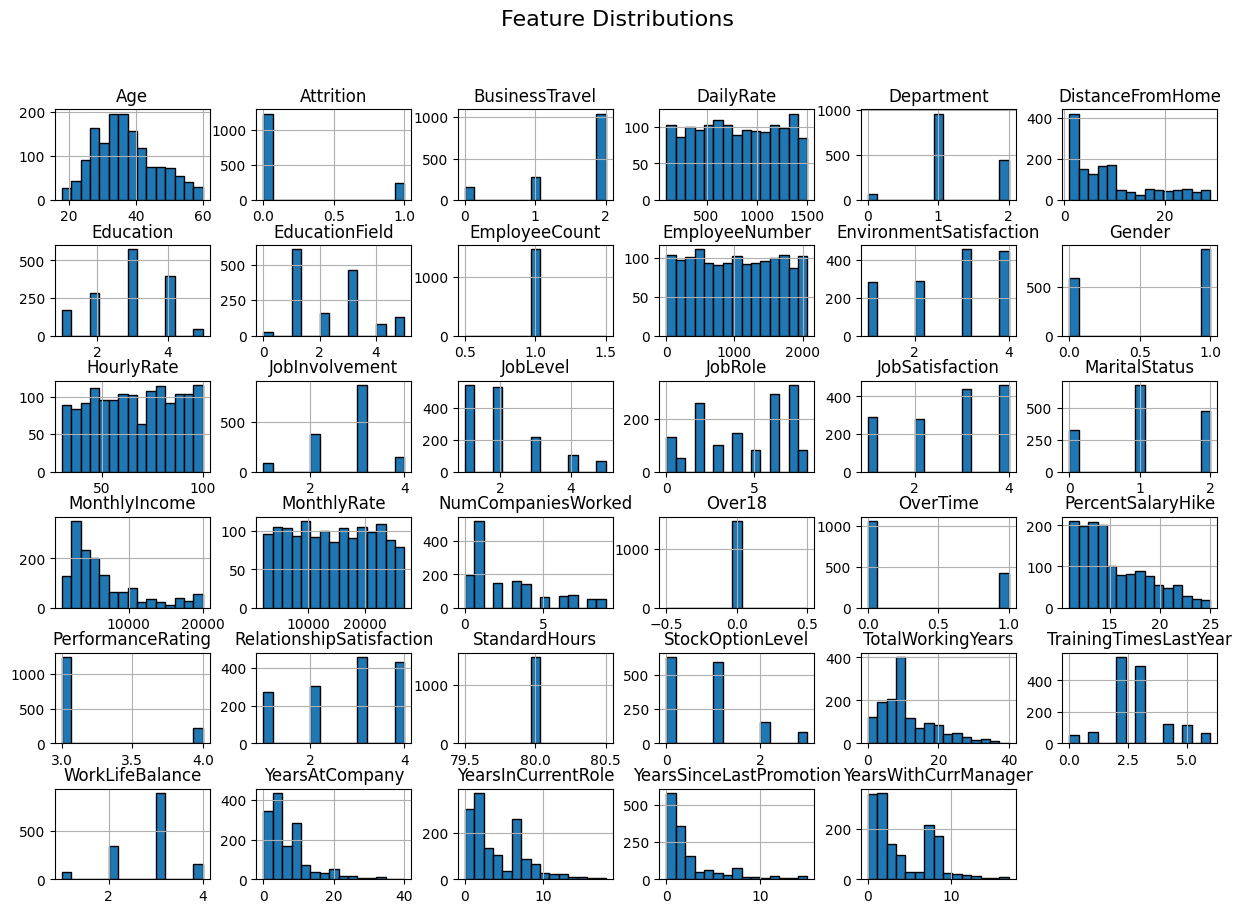

In [ ]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame

# Select only numerical columns from the dataset
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Plot histograms for each numerical feature
numerical_data.hist(bins=15, figsize=(15, 10), edgecolor="black")

# Add a title to the figure
plt.suptitle("Feature Distributions", fontsize=16)

# Add labels to axes
plt.subplots_adjust(hspace=0.5)  # Adjust space between plots
for ax in plt.gcf().axes:
    ax.set_xlabel(ax.get_xlabel(), fontsize=12)  # x-axis labels
    ax.set_ylabel(ax.get_ylabel(), fontsize=12)  # y-axis labels

# Display the plot
plt.show()


<ipython-input-18-b0f00888d1fc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Attrition', data=data, palette='viridis')  # 'Attrition' is the target column


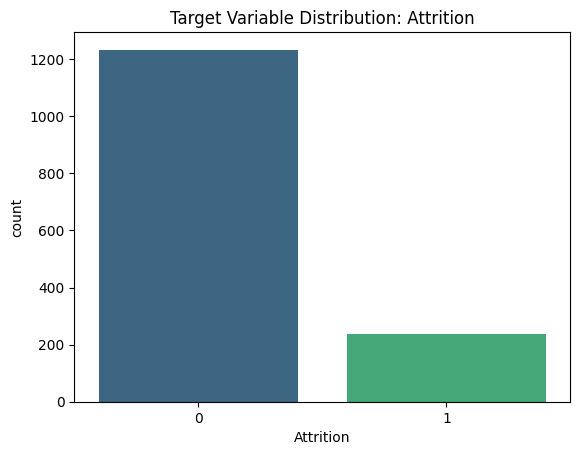

In [ ]:
# Count plot for target variable distribution
sns.countplot(x='Attrition', data=data, palette='viridis')  # 'Attrition' is the target column
plt.title("Target Variable Distribution: Attrition")
plt.show()
